In [2]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Model
from tensorflow.keras.datasets import mnist

import warnings
warnings.filterwarnings(action='ignore')

2024-01-17 22:42:34.723216: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-01-17 22:42:35.322444: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [3]:
(x_train, _), (x_test, _) = mnist.load_data()
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))

In [4]:
input_size = 784  # 28x28 pixels
encoding_dim = 32  # Size of the encoded representation

input_img = Input(shape=(input_size,))
encoded = Dense(encoding_dim, activation='relu')(input_img)
decoded = Dense(input_size, activation='sigmoid')(encoded)

autoencoder = Model(input_img, decoded)
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

2024-01-17 22:42:37.774685: E tensorflow/compiler/xla/stream_executor/cuda/cuda_driver.cc:266] failed call to cuInit: CUDA_ERROR_UNKNOWN: unknown error
2024-01-17 22:42:37.774715: I tensorflow/compiler/xla/stream_executor/cuda/cuda_diagnostics.cc:168] retrieving CUDA diagnostic information for host: sudo-eulus
2024-01-17 22:42:37.774723: I tensorflow/compiler/xla/stream_executor/cuda/cuda_diagnostics.cc:175] hostname: sudo-eulus
2024-01-17 22:42:37.774815: I tensorflow/compiler/xla/stream_executor/cuda/cuda_diagnostics.cc:199] libcuda reported version is: 545.29.6
2024-01-17 22:42:37.774835: I tensorflow/compiler/xla/stream_executor/cuda/cuda_diagnostics.cc:203] kernel reported version is: 545.29.6
2024-01-17 22:42:37.774842: I tensorflow/compiler/xla/stream_executor/cuda/cuda_diagnostics.cc:309] kernel version seems to match DSO: 545.29.6


In [5]:
input_size = 784  # 28x28 pixels
encoding_dim = 32  # Size of the encoded representation

input_img = Input(shape=(input_size,))
encoded = Dense(encoding_dim, activation='relu')(input_img)
decoded = Dense(input_size, activation='sigmoid')(encoded)

autoencoder = Model(input_img, decoded)
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')


In [6]:
autoencoder.fit(x_train, x_train, epochs=50, batch_size=256, shuffle=True, validation_data=(x_test, x_test))

Epoch 1/50


2024-01-17 22:42:49.977479: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 188160000 exceeds 10% of free system memory.
2024-01-17 22:42:50.089556: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 188160000 exceeds 10% of free system memory.


235/235 [==============================] - 2s 5ms/step - loss: 0.2760 - val_loss: 0.1902
Epoch 2/50
235/235 [==============================] - 1s 4ms/step - loss: 0.1710 - val_loss: 0.1537
Epoch 3/50
235/235 [==============================] - 1s 5ms/step - loss: 0.1446 - val_loss: 0.1340
Epoch 4/50
235/235 [==============================] - 1s 4ms/step - loss: 0.1283 - val_loss: 0.1207
Epoch 5/50
235/235 [==============================] - 1s 4ms/step - loss: 0.1176 - val_loss: 0.1123
Epoch 6/50
235/235 [==============================] - 1s 4ms/step - loss: 0.1106 - val_loss: 0.1065
Epoch 7/50
235/235 [==============================] - 1s 4ms/step - loss: 0.1058 - val_loss: 0.1025
Epoch 8/50
235/235 [==============================] - 1s 4ms/step - loss: 0.1021 - val_loss: 0.0993
Epoch 9/50
235/235 [==============================] - 1s 4ms/step - loss: 0.0995 - val_loss: 0.0972
Epoch 10/50
235/235 [==============================] - 1s 4ms/step - loss: 0.0976 - val_loss: 0.0956
Epoch 11/5

313/313 [==============================] - 0s 751us/step


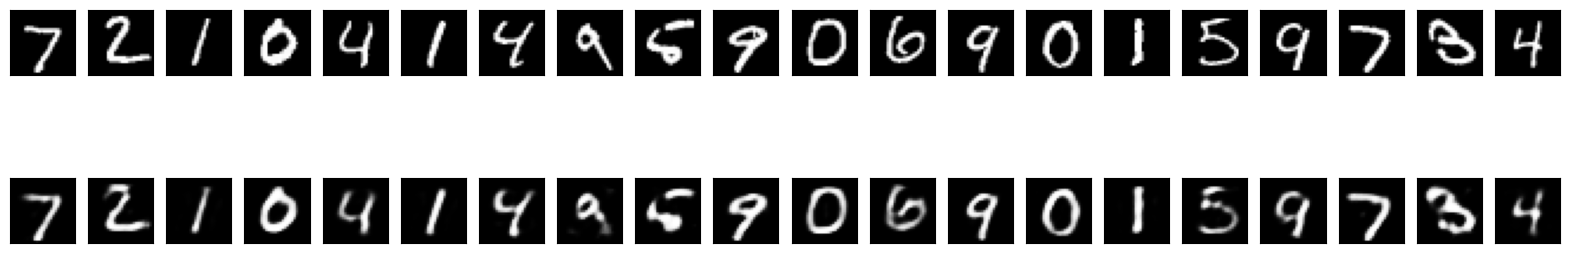

In [10]:
decoded_imgs = autoencoder.predict(x_test)

n = 20 # Number of images to display
plt.figure(figsize=(20, 4))
for i in range(n):
    # Display original images
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Display reconstructed images
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

plt.show()